<a href="https://colab.research.google.com/github/anuragsgupta/Tomato-Plant-Disease-Detection/blob/main/PlantDisease.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Importing Dataset from Kaggle

In [ ]:
%%bash
#install kaggle
pip install -q kaggle

#create a Kaggle folder #copy kaggle.json to copied folder
echo '{"username":"disha1503","key":"3d1810121b6c88f023679868aa91845b"}' > ~/.kaggle/kaggle.json

#permission for json to act
chmod 600 ~/.kaggle/kaggle.json
kaggle datasets download -d shylesh101/tomato-leaf-disease
unzip tomato-leaf-disease.zip
pip install tensorflow


In [ ]:
# from IPython.display import clear_output
# !kaggle datasets download -d shylesh101/tomato-leaf-disease
# !unzip tomato-leaf-disease.zip
# !pip install tensorflow
# clear_output()


Dataset URL: https://www.kaggle.com/datasets/shylesh101/tomato-leaf-disease
License(s): unknown
tomato-leaf-disease.zip: Skipping, found more recently modified local copy (use --force to force download)
Archive:  tomato-leaf-disease.zip
replace tomato_dataset/test/Tomato___Bacterial_spot/0c32d6d5-bf5b-4904-8108-d7a901f2cb6b___UF.GRC_BS_Lab Leaf 8662.JPG? [y]es, [n]o, [A]ll, [N]one, [r]ename: 

## Importing essential Libraries

In [14]:
# Importing all the libraries needed
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import tensorflow as tf
import pandas as pd
import os, requests, cv2, random
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.applications.vgg19 import VGG19
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.applications.resnet50 import preprocess_input
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, GlobalAveragePooling2D,BatchNormalization , Add, Input, Dropout
from tensorflow.keras.callbacks import EarlyStopping,ReduceLROnPlateau
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import models
from tensorflow.keras import Sequential, layers
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow import keras
from sklearn.metrics import confusion_matrix,classification_report

In [2]:
train_data_dir = '/content/tomato_dataset/train'
test_data_dir = '/content/tomato_dataset/test'
val_data_dir = '/content/tomato_dataset/valid'

## Image Augmentation

In [4]:
# ImageDataGenerator
# train_datagen = ImageDataGenerator(preprocessing_function=tf.keras.applications.resnet.preprocess_input)
# val_datagen = ImageDataGenerator(preprocessing_function=tf.keras.applications.resnet.preprocess_input)

train_datagen = ImageDataGenerator(rescale=1/255.0,# Normalizing images
                                  shear_range=0.2,
                                  rotation_range=10,
                                  zoom_range=0.2,
                                  horizontal_flip=True,
                                  validation_split=0.2)# specifying the validation split inside the function

# ImageDataGenerator(
#         rotation_range=10, # rotation
#         width_shift_range=0.2, # horizontal shift
#         height_shift_range=0.2, # vertical shift
#         zoom_range=0.2, # zoom
#         horizontal_flip=True, # horizontal flip
#         brightness_range=[0.2,1.2]) # brightnessLearning Rate	.001
# Drop out	0.01
# Optimizer	Adam
# Shearing	−0.3 to +.3
# Horizontal flipping	True
# Rotating	−10 to +10
# Zooming	0.5 to 1.5
# Batch Size	32
# Validation split	0.2
test_datagen = ImageDataGenerator(rescale=1/255.0,# Normalizing images
                                shear_range=0.2,
                                zoom_range=0.2,
                                horizontal_flip=True)

In [5]:
train_gen = train_datagen.flow_from_directory(
                               train_data_dir,
                                target_size=(224, 224),
                                batch_size=32,
                                shuffle=True,
                                class_mode='categorical',
                                subset='training')
# seed=2020 # to make the result reproducible

Found 14678 images belonging to 10 classes.


In [6]:
val_gen = train_datagen.flow_from_directory(
                                val_data_dir,
                                target_size=(224,224),
                                batch_size=32,
                                shuffle=True,
                                class_mode='categorical',
                                subset='validation')

Found 915 images belonging to 10 classes.


In [7]:
test_gen = test_datagen.flow_from_directory(
        test_data_dir,
        target_size=(224, 224),
        batch_size=32,
        class_mode='categorical',
        shuffle = False) #shuffle will not affect the accuracy of the model, but will affect the computation of some metrics that depend on the order of the samples

Found 50 images belonging to 10 classes.


In [ ]:
cnn1 = models.Sequential()

cnn1.add(layers.Conv2D (32, kernel_size = (3,3), activation='relu', input_shape = [224, 224,3])),
cnn1.add(layers.MaxPooling2D(pool_size = (2, 2))),

cnn1.add(layers.Conv2D(64, (3,3), padding ='same', activation='relu')),
cnn1.add(layers.Conv2D(64, (3,3), padding ='same', activation='relu')),
cnn1.add(layers. MaxPooling2D((2, 2))),

cnn1.add(layers.Conv2D(128, (3, 3), padding ='same', activation='relu')),
cnn1.add(layers.Conv2D(128, (3,3), padding ='same', activation='relu')),
cnn1.add(layers.MaxPooling2D((2, 2))),

cnn1.add(layers. Conv2D(256, (3, 3), padding ='same', activation='relu')),
cnn1.add(layers.Conv2D(256, (3,3), padding ='same', activation='relu')),
cnn1.add(layers.MaxPooling2D((2, 2))),

cnn1.add(layers.Conv2D(512, (3, 3), padding ='same', activation='relu')),
cnn1.add(layers.Conv2D(512, (3, 3), padding ='same', activation='relu')),
cnn1.add(layers.Conv2D(512, (3,3), padding ='same', activation='relu')),
cnn1.add(layers.MaxPooling2D((2, 2))),

cnn1.add(layers.Conv2D(512, (3, 3), padding ='same', activation='relu')),
cnn1.add(layers.Conv2D(512, (3, 3), padding ='same', activation='relu')),
cnn1.add(layers.Conv2D(512, (3,3), padding ='same', activation='relu')),
cnn1.add(layers.MaxPooling2D((2, 2))),

cnn1.add(layers.Flatten()),

cnn1.add(layers.Dense(64,activation='relu')),
cnn1.add(Dropout(0.24)),
#output layer
cnn1.add(layers.Dense(10,activation='softmax'))

In [ ]:
cnn1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 111, 111, 32)      0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 111, 111, 64)      18496     
                                                                 
 conv2d_2 (Conv2D)           (None, 111, 111, 64)      36928     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 55, 55, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_3 (Conv2D)           (None, 55, 55, 128)       7

In [3]:
opt = keras.optimizers.Adam(learning_rate=0.0001)

NameError: name 'keras' is not defined

In [ ]:
cnn1.compile(optimizer=opt,loss='categorical_crossentropy',metrics=['accuracy'])

In [8]:
# Define early stopping callback
es = EarlyStopping(monitor = 'val_accuracy',
                   mode = 'max',
                   patience = 20,
                   verbose = 1,
                   restore_best_weights = True)

In [ ]:
history = cnn1.fit(x = train_gen,
                    callbacks = [es],
                    steps_per_epoch = 14678//32,
                    epochs = 20,
                    validation_steps = 915//32,
                    validation_data = val_gen)

Epoch 1/20
139/458 [========>.....................] - ETA: 2:15 - loss: 2.3025 - accuracy: 0.1045

In [ ]:
scores1 = cnn1.evaluate(test_gen)

In [ ]:
#don't forget to save your model for later
cnn1.save('cnn1.h5')

VGG16 Model

In [ ]:
model1 = VGG16(include_top=False, weights='imagenet',input_shape=(224,224,3))
model1.trainable=False

58889256/58889256 [==============================] - 4s 0us/step


In [ ]:
cnn2=keras.models.Sequential()
cnn2.add(model1)
cnn2.add(Flatten())
cnn2.add(layers.Dense(64,activation='relu'))
cnn2.add(layers.Dense(10,activation='softmax'))
cnn2.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 7, 7, 512)         14714688  
                                                                 
 flatten (Flatten)           (None, 25088)             0         
                                                                 
 dense (Dense)               (None, 64)                1605696   
                                                                 
 dense_1 (Dense)             (None, 10)                650       
                                                                 
Total params: 16321034 (62.26 MB)
Trainable params: 1606346 (6.13 MB)
Non-trainable params: 14714688 (56.13 MB)
_________________________________________________________________


In [ ]:
opt = keras.optimizers.Adam(learning_rate=0.01)

In [ ]:
cnn2.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
history = cnn2.fit(x = train_gen,
                    callbacks = [es],
                    # steps_per_epoch = 12845//32,
                    epochs = 20,
                    # validation_steps = 1372//32,
                    validation_data = val_gen)

NameError: name 'es' is not defined

In [ ]:
scores2 = cnn2.evaluate(test_gen)

In [ ]:
cnn2.save('cnn2.h5')

**VGG19** Model

In [ ]:
model2 = VGG19(include_top=False, weights='imagenet',input_shape=(224,224,3))
model2.trainable=False

80134624/80134624 [==============================] - 5s 0us/step


In [ ]:
cnn3=keras.models.Sequential()
cnn3.add(model1)
cnn3.add(Flatten())
cnn3.add(layers.Dense(64,activation='relu'))
cnn3.add(layers.Dense(10,activation='softmax'))
cnn3.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 7, 7, 512)         14714688  
                                                                 
 flatten (Flatten)           (None, 25088)             0         
                                                                 
 dense (Dense)               (None, 64)                1605696   
                                                                 
 dense_1 (Dense)             (None, 10)                650       
                                                                 
Total params: 16321034 (62.26 MB)
Trainable params: 1606346 (6.13 MB)
Non-trainable params: 14714688 (56.13 MB)
_________________________________________________________________


In [4]:
opt = keras.optimizers.Adam(learning_rate=0.1)

NameError: name 'keras' is not defined

In [ ]:
cnn3.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
history = cnn3.fit(x = train_gen,
                    callbacks = [es],
                    # steps_per_epoch = 12845//32,
                    epochs = 20,
                    # validation_steps = 1372//32,
                    validation_data = val_gen)

In [ ]:

history_20_epochs = cnn3.fit(x = train_gen,
                    callbacks = [es],
                    # steps_per_epoch = 12845//32,
                    epochs = 20,
                    # validation_steps = 1372//32,
                    validation_data = val_gen)

Epoch 1/20
101/101 [==============================] - 244s 2s/step - loss: 1.4632 - accuracy: 0.5600 - val_loss: 0.9365 - val_accuracy: 0.7150
Epoch 2/20
101/101 [==============================] - 195s 2s/step - loss: 0.7107 - accuracy: 0.7791 - val_loss: 0.7362 - val_accuracy: 0.7573
Epoch 3/20
101/101 [==============================] - 199s 2s/step - loss: 0.5103 - accuracy: 0.8399 - val_loss: 0.6033 - val_accuracy: 0.8207
Epoch 4/20
101/101 [==============================] - 199s 2s/step - loss: 0.4203 - accuracy: 0.8706 - val_loss: 0.5232 - val_accuracy: 0.8331
Epoch 5/20
101/101 [==============================] - 200s 2s/step - loss: 0.3445 - accuracy: 0.8965 - val_loss: 0.4809 - val_accuracy: 0.8440
Epoch 6/20
101/101 [==============================] - 199s 2s/step - loss: 0.2998 - accuracy: 0.9077 - val_loss: 0.5024 - val_accuracy: 0.8331
Epoch 7/20
101/101 [==============================] - 199s 2s/step - loss: 0.2679 - accuracy: 0.9177 - val_loss: 0.4146 - val_accuracy: 0.8703

In [ ]:
scores3 = cnn3.evaluate(test_gen)

2/2 [==============================] - 5s 5s/step - loss: 0.4392 - accuracy: 0.9000


In [ ]:
cnn3.save('cnn3.h5')
# Complete at 20 epochs on relu

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [ ]:
# created by anurag testing accuracy on tanh at 20 epochs
cnn3=keras.models.Sequential()
cnn3.add(model1)
cnn3.add(Flatten())
cnn3.add(layers.Dense(64,activation='tanh'))
cnn3.add(layers.Dense(10,activation='softmax'))
cnn3.summary()

cnn3.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])
history_20_epochs_tanh = cnn3.fit(x = train_gen,
                    callbacks = [es],
                    # steps_per_epoch = 12845//32,
                    epochs = 20,
                    # validation_steps = 1372//32,
                    validation_data = val_gen)

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 7, 7, 512)         14714688  
                                                                 
 flatten_2 (Flatten)         (None, 25088)             0         
                                                                 
 dense_4 (Dense)             (None, 64)                1605696   
                                                                 
 dense_5 (Dense)             (None, 10)                650       
                                                                 
Total params: 16321034 (62.26 MB)
Trainable params: 1606346 (6.13 MB)
Non-trainable params: 14714688 (56.13 MB)
_________________________________________________________________
Epoch 1/20
101/101 [==============================] - 199s 2s/step - loss: 2.5034 - accuracy: 0.3622 - val_loss: 1.8634 - val_accuracy: 0.51

KeyboardInterrupt: 

Resnet50 Model

In [5]:
model3 = ResNet50(include_top=False,weights='imagenet',input_shape=(224,224,3),classes=10)
model3.trainable=False

NameError: name 'ResNet50' is not defined

In [12]:
# Load pre-trained ResNet50 model without top layers
model3 = ResNet50(include_top=False,weights='imagenet',input_shape=(224,224,3),classes=10)

# Freeze base model layers
for layer in model3.layers:
    layer.trainable = False

pt = Input(shape=(224,224,3))
func = tf.cast(pt,tf.float32)
x = preprocess_input(func)#This function used to zero-center each color channel wrt Imagenet dataset

# Add custom classification layers on top of ResNet50

# model_resnet = model3(x,training=False)
# model_resnet = GlobalAveragePooling2D()(model_resnet)
# model_resnet = Dense(128,activation='relu')(model_resnet)
# model_resnet = Dense(64,activation='relu')(model_resnet)
# model_resnet = Dense(10,activation='softmax')(model_resnet)

model_resnet = model3(x,training=False)
model_resnet = GlobalAveragePooling2D()(model_resnet)
model_resnet =  BatchNormalization()(model_resnet)
model_resnet =  Dropout(0.5)(model_resnet)
model_resnet = Dense(512,activation='relu')(model_resnet)
model_resnet =  BatchNormalization()(model_resnet)
model_resnet =  Dropout(0.5)(model_resnet)
model_resnet = Dense(10,activation='softmax')(model_resnet)


cnn4 = Model(inputs=pt,outputs=model_resnet)
cnn4.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_5 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 tf.cast_1 (TFOpLambda)      (None, 224, 224, 3)       0         
                                                                 
 tf.__operators__.getitem_1  (None, 224, 224, 3)       0         
  (SlicingOpLambda)                                              
                                                                 
 tf.nn.bias_add_1 (TFOpLamb  (None, 224, 224, 3)       0         
 da)                                                             
                                                                 
 resnet50 (Functional)       (None, 7, 7, 2048)        23587712  
                                                                 
 global_average_pooling2d_1  (None, 2048)              0   

In [13]:
cnn4.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [14]:
# Define learning rate reduction callback
lr=ReduceLROnPlateau(monitor='val_accuracy',verbose=1,patience=5,min_lr=0.0001)

In [ ]:
# Train the model
cnn4_history_at_20_epochs_resnet = cnn4.fit(x = train_gen,
                    callbacks = [es,lr],
                    # steps_per_epoch = 12845//32,
                    epochs = 20,
                    # validation_steps = 1372//32,
                    validation_data = val_gen)

history = model3.fit(train_gen, epochs=20, validation_data=val_gen, callbacks=[es, lr])

Epoch 1/20
459/459 [==============================] - 3347s 7s/step - loss: 2.1022 - accuracy: 0.3600 - val_loss: 1.7890 - val_accuracy: 0.3694 - lr: 0.0010
Epoch 2/20
459/459 [==============================] - 3446s 8s/step - loss: 1.6394 - accuracy: 0.4458 - val_loss: 1.2889 - val_accuracy: 0.5519 - lr: 0.0010
Epoch 3/20
459/459 [==============================] - 3338s 7s/step - loss: 1.5302 - accuracy: 0.4743 - val_loss: 1.2095 - val_accuracy: 0.5661 - lr: 0.0010
Epoch 4/20
459/459 [==============================] - 3356s 7s/step - loss: 1.4426 - accuracy: 0.4999 - val_loss: 1.1885 - val_accuracy: 0.5847 - lr: 0.0010
Epoch 5/20
459/459 [==============================] - 3328s 7s/step - loss: 1.4093 - accuracy: 0.5076 - val_loss: 1.1856 - val_accuracy: 0.5770 - lr: 0.0010
Epoch 6/20
459/459 [==============================] - 3289s 7s/step - loss: 1.4045 - accuracy: 0.5089 - val_loss: 1.1661 - val_accuracy: 0.6000 - lr: 0.0010
Epoch 7/20
362/459 [======================>.......] - ETA:

In [ ]:
scores4 = cnn4.evaluate(test_gen)

In [ ]:
cnn4.save('cnn4.h5')

### Resnet50 Model change parmeter to gain accuracy

 resnet50 by anurag gupta


In [ ]:
# resnet50 by anurag gupta

# es = EarlyStopping(monitor = 'val_accuracy',
#                    mode = 'max',
#                    patience = 20,
#                    verbose = 1,
#                    restore_best_weights = True)

# # Load pre-trained ResNet50 model without top layers
# model3 = ResNet50(include_top=False,weights='imagenet',input_shape=(224,224,3),classes=10)

# # Freeze base model layers
# for layer in model3.layers:
#     layer.trainable = False
# pt = Input(shape=(224,224,3))
# func = tf.cast(pt,tf.float32)
# x = preprocess_input(func)

# #This function used to zero-center each color channel wrt Imagenet dataset
# opt = keras.optimizers.Adam(learning_rate=0.1)

# model_resnet = model3(x,training=False)
# model_resnet = GlobalAveragePooling2D()(model_resnet)
# model_resnet = Dense(128,activation='relu')(model_resnet)
# model_resnet = Dense(64,activation='relu')(model_resnet)
# model_resnet = Dense(10,activation='softmax')(model_resnet)


# cnn4 = Model(inputs=pt,outputs=model_resnet)
# cnn4.summary()

# cnn4.compile(optimizer='adam',
#               loss='categorical_crossentropy',
#              metrics=['accuracy'])
# # Define learning rate reduction callback

In [11]:
import tensorflow as tf

from tensorflow.keras.applications import ResNet50
from tensorflow.keras.layers import Input, GlobalAveragePooling2D, Dense
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from tensorflow.keras.preprocessing.image import ImageDataGenerator
lr=ReduceLROnPlateau(monitor='val_accuracy',verbose=1,patience=5,min_lr=0.0001)


es = EarlyStopping(monitor = 'val_accuracy',
                   mode = 'max',
                   patience = 20,
                   verbose = 1,
                   restore_best_weights = True)



# Load pre-trained ResNet50 model without top layers
base_model = ResNet50(include_top=False, weights='imagenet', input_shape=(224, 224, 3))

# Freeze base model layers
for layer in base_model.layers:
    layer.trainable = False

# Add custom classification layers on top of ResNet50
x = GlobalAveragePooling2D()(base_model.output)
x = Dense(128, activation='relu')(x)
x = Dense(64, activation='relu')(x)
output = Dense(10, activation='softmax')(x)

# Define the model
model = Model(inputs=base_model.input, outputs=output)

# Compile the model
model.compile(optimizer=Adam(learning_rate=0.001), loss='categorical_crossentropy', metrics=['accuracy'])

# Define data generators
train_data_dir = '/content/tomato_dataset/train'
test_data_dir = '/content/tomato_dataset/test'
val_data_dir = '/content/tomato_dataset/valid'

train_datagen = ImageDataGenerator(preprocessing_function=tf.keras.applications.resnet.preprocess_input)
val_datagen = ImageDataGenerator(preprocessing_function=tf.keras.applications.resnet.preprocess_input)

train_gen = train_datagen.flow_from_directory(train_data_dir, target_size=(224, 224), batch_size=32, class_mode='categorical')
val_gen = val_datagen.flow_from_directory(val_data_dir, target_size=(224, 224), batch_size=32, class_mode='categorical')



Found 18345 images belonging to 10 classes.
Found 4585 images belonging to 10 classes.


In [15]:

# Train the model
history = model.fit(train_gen, epochs=20, validation_data=val_gen, callbacks=[es, lr])


Epoch 1/20
 33/574 [>.............................] - ETA: 58s - loss: 0.0139 - accuracy: 0.9953

KeyboardInterrupt: 

In [16]:
## resnet50 with dropout layers
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.layers import Input, GlobalAveragePooling2D, Dense
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from tensorflow.keras.preprocessing.image import ImageDataGenerator





# Load pre-trained ResNet50 model without top layers
base_model = ResNet50(include_top=False, weights='imagenet', input_shape=(224, 224, 3))

# Freeze base model layers
for layer in base_model.layers:
    layer.trainable = False



# model_resnet = model3(x,training=False)
model_resnet = GlobalAveragePooling2D()(base_model.output)
model_resnet =  BatchNormalization()(model_resnet)
model_resnet =  Dropout(0.5)(model_resnet)
model_resnet = Dense(512,activation='relu')(model_resnet)
model_resnet =  BatchNormalization()(model_resnet)
model_resnet =  Dropout(0.5)(model_resnet)
output = Dense(10,activation='softmax')(model_resnet)

# Add custom classification layers on top of ResNet50
# x = GlobalAveragePooling2D()(base_model.output)
# x = Dense(128, activation='relu')(x)
# x = Dense(64, activation='relu')(x)
# output = Dense(10, activation='softmax')(x)

# Define the model
model_with_dropout = Model(inputs=base_model.input, outputs=output)

# Compile the model
model_with_dropout.compile(optimizer=Adam(learning_rate=0.001), loss='categorical_crossentropy', metrics=['accuracy'])

# Define data generators
train_data_dir = '/content/tomato_dataset/train'
test_data_dir = '/content/tomato_dataset/test'
val_data_dir = '/content/tomato_dataset/valid'
train_datagen = ImageDataGenerator(preprocessing_function=tf.keras.applications.resnet.preprocess_input)
val_datagen = ImageDataGenerator(preprocessing_function=tf.keras.applications.resnet.preprocess_input)

train_gen = train_datagen.flow_from_directory(train_data_dir, target_size=(224, 224), batch_size=32, class_mode='categorical')
val_gen = val_datagen.flow_from_directory(val_data_dir, target_size=(224, 224), batch_size=32, class_mode='categorical')

# Train the model



Found 18345 images belonging to 10 classes.
Found 4585 images belonging to 10 classes.


In [17]:
model_with_dropout.summary()

Model: "model_4"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_6 (InputLayer)        [(None, 224, 224, 3)]        0         []                            
                                                                                                  
 conv1_pad (ZeroPadding2D)   (None, 230, 230, 3)          0         ['input_6[0][0]']             
                                                                                                  
 conv1_conv (Conv2D)         (None, 112, 112, 64)         9472      ['conv1_pad[0][0]']           
                                                                                                  
 conv1_bn (BatchNormalizati  (None, 112, 112, 64)         256       ['conv1_conv[0][0]']          
 on)                                                                                        

In [18]:
history_with_dropout = model_with_dropout.fit(train_gen, epochs=20, validation_data=val_gen, callbacks=[es, lr])


Epoch 1/20
574/574 [==============================] - 85s 138ms/step - loss: 0.5458 - accuracy: 0.8286 - val_loss: 0.1501 - val_accuracy: 0.9466 - lr: 0.0010
Epoch 2/20
574/574 [==============================] - 79s 137ms/step - loss: 0.2699 - accuracy: 0.9084 - val_loss: 0.1121 - val_accuracy: 0.9597 - lr: 0.0010
Epoch 3/20
574/574 [==============================] - 78s 136ms/step - loss: 0.2215 - accuracy: 0.9244 - val_loss: 0.1063 - val_accuracy: 0.9638 - lr: 0.0010
Epoch 4/20
574/574 [==============================] - 78s 137ms/step - loss: 0.1979 - accuracy: 0.9340 - val_loss: 0.0928 - val_accuracy: 0.9682 - lr: 0.0010
Epoch 5/20
574/574 [==============================] - 84s 146ms/step - loss: 0.1748 - accuracy: 0.9389 - val_loss: 0.0856 - val_accuracy: 0.9706 - lr: 0.0010
Epoch 6/20
574/574 [==============================] - 79s 138ms/step - loss: 0.1675 - accuracy: 0.9412 - val_loss: 0.0788 - val_accuracy: 0.9762 - lr: 0.0010
Epoch 7/20
574/574 [==============================] 

In [32]:
load_model = tf.keras.models.load_model("/content/cnnResnet50_with_dropout.h5")

In [19]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
model_with_dropout.save('./drive/MyDrive/cnnModel/cnnResnet50_with_dropout.h5')

In [27]:
drive.flush_and_unmount()

In [28]:
scores4_with_dropout = model_with_dropout.evaluate(train_gen)

574/574 [==============================] - 63s 109ms/step - loss: 0.0054 - accuracy: 0.9995


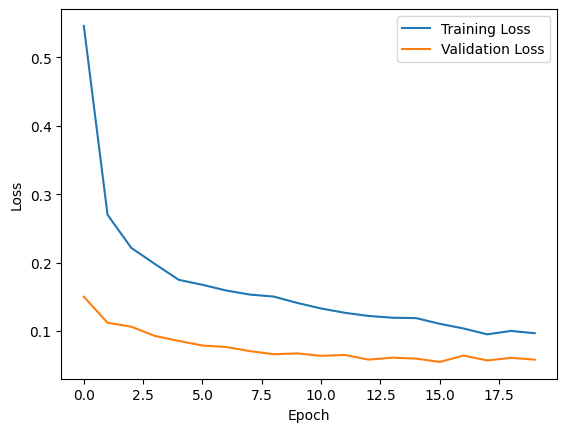

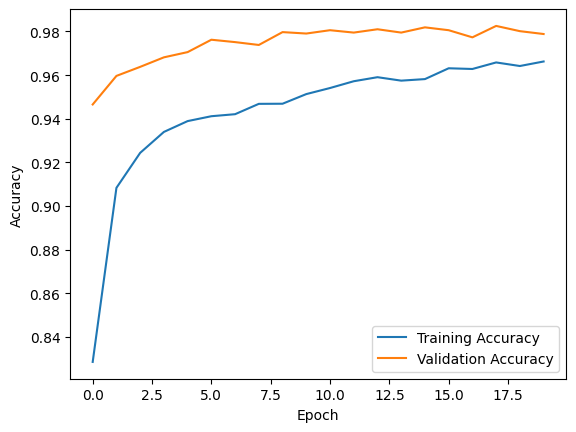

IndexError: tuple index out of range

In [37]:
import matplotlib.pyplot as plt

# Plot training and validation loss
plt.plot(history_with_dropout.history['loss'], label='Training Loss')
plt.plot(history_with_dropout.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Plot training and validation accuracy
plt.plot(history_with_dropout.history['accuracy'], label='Training Accuracy')
plt.plot(history_with_dropout.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Evaluate the model on the test set
test_loss, test_accuracy = model.evaluate(test_data_dir)
print(f'Test Loss: {test_loss}, Test Accuracy: {test_accuracy}')


### Task VGG16/19:: Run model at 20 epoch and save it


In [ ]:
# plt.plot(history.history['loss'], label='Training loss')
# plt.plot(history.history['val_loss'], label='Validation loss')
# plt.legend()
# plt.show()

# # plot the accuracy
# plt.plot(history.history['accuracy'], label='Training accuracy')
# plt.plot(history.history['val_accuracy'], label='Validation accuracy')
# plt.legend()
# plt.show()

NameError: name 'history' is not defined

In [ ]:
# test_steps_per_epoch = np.math.ceil(test_gen.samples / test_gen.batch_size)

In [ ]:
# # Predict classes
# predictions = cnn.predict(test_gen, steps=test_steps_per_epoch)

In [ ]:
# predictions[1]

In [ ]:
# predicted_classes = np.argmax(predictions,axis=1)

In [ ]:
# # Get ground-truth classes and class-labels
# true_classes = test_gen.classes
# class_labels = list(test_gen.class_indices.keys())

In [ ]:
# # Print confusion matrix
# confusion_matrix = confusion_matrix(test_gen.classes, predicted_classes)
# print(confusion_matrix)

In [ ]:
# report = classification_report(true_classes, predicted_classes, target_names=class_labels)
# print(report)